# Game of Life


The [Game of Life](http://en.wikipedia.org/wiki/Conway's_Game_of_Life) (GoF) is a cellular automaton devised by the British mathematician John Horton Conway in 1970. The game is a zero-player game, meaning that its evolution is determined by its initial state, requiring no further input. One interacts with the Game of Life by creating an initial configuration and observing how it evolves, or, for advanced players, by creating patterns with particular properties.

The universe of the Game of Life is an infinite two-dimensional orthogonal grid of square cells, each of which is in one of two possible states, live or dead. Every cell interacts with its eight neighbours, which are the cells that are directly horizontally, vertically, or diagonally adjacent. At each step in time, the following transitions occur:

* Any live cell with fewer than two live neighbours dies, as if by underpopulation.
* Any live cell with more than three live neighbours dies, as if by overcrowding.
* Any live cell with two or three live neighbours lives, unchanged, to the next generation.
* Any dead cell with exactly three live neighbours becomes a live cell.

The initial pattern (generation 0) constitutes the "seed" of the system.
Time is considered discrete, and each time step (sometimes called a tick), the previous rules are applied simultaneously to every cell in the grid; "births" and "deaths" are immediate.
Each generation is a pure function of the previous generation alone.


## Assignments

* Begin by implementing the GoF's rules and create few examples with basic seeds in small dimensions. Hint: create `.gif` animations from sequences of still `.png` images
* Implement examples of the three categories of patterns *still lifes*, *oscillators* and *spaceships* (check the [wiki link](http://en.wikipedia.org/wiki/Conway's_Game_of_Life))
* Analyse the evolutions of these patterns in terms of frequency (the number of cycles required to return to the original configuration, if any), occupancy (how many alive cells there are at every step of the game), replication or heat (the average number of cells that change state at each generation), speed (if applicable), etc.
* Increase the size of the GoF's world and play with more advanced and complex patterns

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from PIL import Image
from IPython.display import HTML, display
%matplotlib inline
import matplotlib.animation as animation
import matplotlib
import warnings
warnings.filterwarnings('ignore')

In [2]:
!mkdir gifs

mkdir: gifs: File exists


## Create Starting Grid

* Takes a initial pattern, grid size (N) and creates a grid by placing the pattern in the center of the grid
* If the pattern size is greater than N, N = size of pattern

In [3]:
def createStartingGrid(state, N = 20):
    n = len(state)
    if n > N: N = n
    grid = np.zeros((N,N), dtype = int)
    grid_mid = int(N/2)
    patt_mid = int(n/2)
    if n % 2 == 0:
        grid[grid_mid-patt_mid:grid_mid+patt_mid,grid_mid-patt_mid:grid_mid+patt_mid] = state
    else:
        grid[grid_mid-patt_mid:grid_mid+patt_mid+1,grid_mid-patt_mid:grid_mid+patt_mid+1] = state
    return grid

## Count Cell Neighbours

* Takes cell position in our grid (i,j), grid size (N) and the grid as input
* Returns the number of live neighbours

In [3]:
def neighbourCount(i,j,N,state = None):
    nei = []
# Iterate over the cells in the 3x3 area surrounding the cell
    for c in product(*(range(n-1, n+2) for n in (i,j))):
        # Check if the cell is not the original cell and within the bounds of the grid
        if c != (i,j) and all(0 <= n < N for n in c):
            # Add the state of the cell to the list of live neighbors
            nei.append(state[c])
    # Return the sum of the live neighbors
    return np.sum(nei)



## Calculate Next Generation

* Takes the initial grid and return a new grid with the next generation

In [5]:
def nextGeneration(init_state):
    state = init_state.copy()
    grid_size = len(state)
    next_gen = (np.random.randint(1,size = grid_size**2)).reshape(grid_size,grid_size)
    for i in range(grid_size):
        for j in range(grid_size):
            neigh = neighbourCount(i,j,grid_size,state)
            if(neigh == 3 and state[i,j] == 0):
                next_gen[i,j] = 1
            elif((neigh == 2 or neigh == 3) and state[i,j] == 1):
                next_gen[i,j] = 1
            else:
                next_gen[i,j] = 0
    return next_gen
        


## Game of Life

* Returns the list of generation over a period of time, given the initial grid (`0th Generation`) as input.

In [6]:
def gameOfLife(state, period = 20):
        temp_state = state.copy()    
        grid_seq = [temp_state]
        grid_size = len(temp_state)
        curr_gen = temp_state
        for t in range(1,period):
            next_gen = nextGeneration(curr_gen)
            grid_seq.append(next_gen)
            curr_gen = next_gen
            if np.count_nonzero(next_gen) == 0:
                break
        return grid_seq

## Create Gifs
* Create gifs from the list of generations

In [7]:
def createGifs(gen_list,pattern_name):
    # Create new figure for GIF
    fig, ax = plt.subplots()
    # Adjust figure so GIF does not have extra whitespace
    fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
    ax.axis('off')
    ims = []

    for gen in gen_list:
        im = ax.imshow(gen)
        ims.append([im])
        
    plt.close()
    ani = animation.ArtistAnimation(fig, ims, interval=100)
    ani.save('./gifs/'+pattern_name+'.gif')

## Occupation

* Number of alive cells at each generation

In [8]:
def occupation(gen_list):
    count = []
    for gen in gen_list:
        count.append(np.count_nonzero(gen))
    fig, ax = plt.subplots(figsize=(7.5,5))
    time_steps = np.linspace(0, len(count), len(count), endpoint=True)
    ax.plot(time_steps,count,'--',linewidth=2, color='purple')
    ax.set_xlabel('Generation', fontsize=12)
    ax.set_ylabel('No. of live cells', fontsize=12)
    ax.set_title('Occupancy', fontsize=25)
    ax.grid(True, linestyle='-.')
    ax.tick_params(labelcolor='k', labelsize=12, width=5)


## Frequency
* Number of cycles required to return to the original configuration

In [9]:
def periodOfRepetition(pattern,sequence):
    pat_len = len(pattern)
    pad = math.floor(pat_len/2)
    count = 0;
    for seq in sequence[1:]:
        temp_seq = np.pad(seq,pad)
        for i in range(0,len(temp_seq)-pad*2):
            for j in range(0,len(temp_seq)-pad*2):               
                temp = temp_seq[i:i+(pat_len),j:j+(pat_len)]
                if (temp == pattern).all():
                    return (count+1);
        count+=1
    return count

In [10]:
def frequency(period):
    if period==0:
        print('Does not return to original state over the lifetime of the universe.')
    else:
        print('Frequency:',1/period)

## Replication/Heat

* Number of cells that change state at each step

In [11]:
def replication(gen_list):
    
    
    heat = []
    birth=[]
    dead=[]
    
    
    for i in range(0,len(gen_list)-1):
        
        born = (gen_list[i] | gen_list[i+1]) - gen_list[i]
        birth.append(np.count_nonzero(born))
        
        died = (gen_list[i] | gen_list[i+1]) - gen_list[i+1]
        dead.append(np.count_nonzero(died))
        
        diff_result = gen_list[i] ^ gen_list[i+1]
        heat.append(np.count_nonzero(diff_result))
        
    heat = np.array(heat)
    birth = np.array(birth)
    dead = np.array(dead)
    
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
    time_steps = np.linspace(1, len(heat), len(heat), endpoint=True)
    
    
    
    ax1.plot(time_steps,heat, 'o-', label='heat', color='orange', alpha=0.4, linewidth=3)
    ax2.plot(time_steps, birth, label='birth',  marker=10, markersize= 10, alpha=0.7, color='green', linewidth=3)
    ax2.plot(time_steps, dead, label='dead',marker=11, markersize=10, alpha=0.5, color='red', linewidth=3)
    
    ax1.set_xlabel('Generation', fontsize=15)
    ax1.set_ylabel('No. of cells changing state', fontsize=15)
    ax1.legend(loc='upper right', fontsize=12, prop = {'size' : 20})
    ax1.grid(True, linestyle='-.')
    ax1.tick_params(labelcolor='k', labelsize=12, width=5)

    
    fig.suptitle('Replication', fontsize=30)
    
    ax2.set_xlabel('Generation', fontsize=15)
    ax2.set_ylabel('No. of cells changing state', fontsize=15)
    ax2.legend(loc='upper right', fontsize=12, prop = {'size' : 20})
    ax2.grid(True, linestyle='-.')
    ax2.tick_params(labelcolor='k', labelsize=12, width=5)
      
    
    return heat.mean()

## Heatmap

* Heatmap of the probability of each cell being alive and the number of times each cell has been alive

In [12]:
def generate_heatmap(gen_list):
    # Determine the size of the grid
    size = gen_list[0].shape[0]

    # Create a 2D array to store the heatmap data
    heatmap = np.zeros((size, size), dtype=int)
    number_live_cells = np.zeros((size, size), dtype=int)

    # Iterate over the generations and update the heatmap
    for i, gen in enumerate(gen_list):
        heatmap = heatmap + (gen * (2**i))
        number_live_cells = number_live_cells + gen

    # Calculate the probability of each cell being alive
    prob = (heatmap / (2 ** len(gen_list)))

    # Plot the heatmap with probability values
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 7))
    
    fig.suptitle('Grid Heat Maps', fontsize=25)
    
    # Plot the number of times each cell has been alive
    ax1.imshow(number_live_cells.astype(np.float32), cmap='Reds')
    ax1.set_title('Number of times each cell has been alive', fontsize=12)
    ax1.axis('off')

    # Plot the probability of each cell being alive
    cax = ax2.imshow(prob.astype(np.float32), cmap='Blues', norm=matplotlib.colors.Normalize(vmin=0, vmax=1))
    ax2.set_title('Probability of each cell being alive', fontsize=12)
    ax2.axis('off')
    
    # Add probability values to the heatmap
    for i in range(size):
        for j in range(size):
            ax2.text(j, i, f"{prob[i,j]:.2f}", ha='center', va='center', fontsize=8, color='white')
            ax1.text(j, i, f"{number_live_cells[i,j]:.2f}", ha='center', va='center', fontsize=8, color='white')

    # Add colorbars to the subplots
    fig.colorbar(cax, ax=[ax1, ax2])

    plt.show()


## Entropy
* Calculates the entropy of the Game of Life based on the variability in the number of alive cells over time.

In [13]:
def calculate_entropy(gen_list):
    num_alive_cells = []
    for gen in gen_list:
        num_alive_cells.append(np.sum(gen))

    entropy = 0
    total_cells = len(gen_list[0].flatten())
    for num in num_alive_cells:
        p = num / total_cells
        if p > 0:
            entropy += -p * np.log2(p)

    return entropy


# Still Life
## 1. Block

Block is a simple still life pattern in the Game of Life. It consists of a 2x2 square of live cells, and does not change from generation to generation. Here is a small analysis of the replication, frequency, heatmap, and occupancy of Block:

In [14]:
display(HTML('''<div style="display: flex; justify-content: row;">
    <img src="./gifs/block.gif">
</div>'''))

In [15]:
block = np.array([
    [1,1],
    [1,1]
    ])
block_grid = createStartingGrid(block)
block_gen_list = gameOfLife(block_grid)
createGifs(block_gen_list,'block')

MovieWriter ffmpeg unavailable; using Pillow instead.


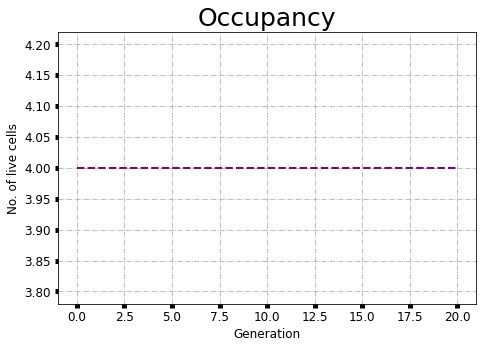

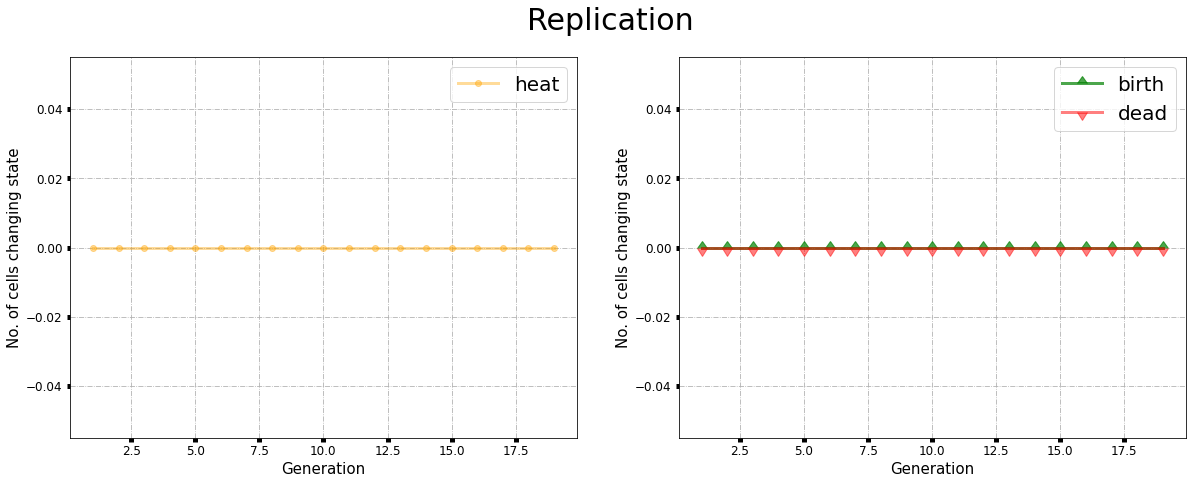

In [19]:
occupation(block_gen_list)
grad = replication(block_gen_list)
period = periodOfRepetition(block,block_gen_list)


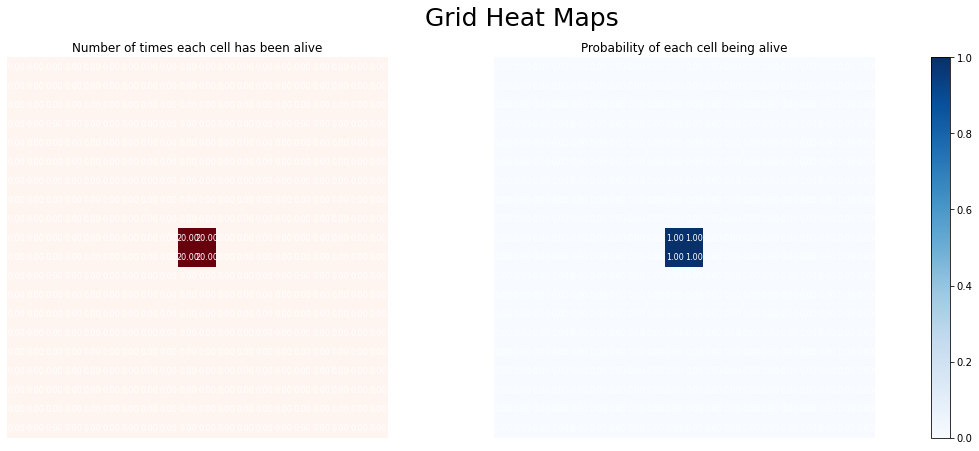

In [20]:
generate_heatmap(block_gen_list)

In [21]:
frequency(period)

entropy = calculate_entropy(block_gen_list)
print(f"Entropy: {entropy}")
print('No. of cycles to return to get to initial pattern:',period)
print('Average no. of block cells changing state at each transition:',grad)

Frequency: 1.0
Entropy: 1.3287712379549446
No. of cycles to return to get to initial pattern: 1
Average no. of block cells changing state at each transition: 0.0


* **Frequency:** The block has a frequency of 1.0, meaning it appears in every generation of the game.
* **Entropy:** The entropy value for the block is around 1.32877, which indicates that the randomness or disorder in the pattern is very low. This is because the block is a stable pattern that does not change over time.
* **Replication:** The block returns to its initial pattern after just one cycle. This means that the block is a period-1 oscillator, which is a type of pattern that repeats itself every generation.
* **Heatmap:** The heatmap for the block will remain constant over time. The heatmap shows the probability of each cell being alive in each generation. For the block, the probability will be 1 for each of the four cells in the pattern in every generation.
* **Occupancy:** The occupancy for the block will also remain constant over time. The occupancy shows the number of alive cells in each generation. For the block, the occupancy will be 4 in every generation because the pattern consists of four cells.

## 2. Bee-hive

Beehive is a 6-cell still life. It can be seen as a weld of two tubs. As a tetromino descendant, it was one of the first objects found.

In [22]:
display(HTML('''<div style="display: flex; justify-content: row;">
    <img src="./gifs/bee-hive.gif">
</div>'''))

In [23]:
bee_hive=np.array([
    [0,0,0,0],
    [0,1,1,0],
    [1,0,0,1],
    [0,1,1,0]
    ])
honeycomb = createStartingGrid(bee_hive)
hive_list = gameOfLife(honeycomb)
createGifs(hive_list,'bee-hive')


MovieWriter ffmpeg unavailable; using Pillow instead.


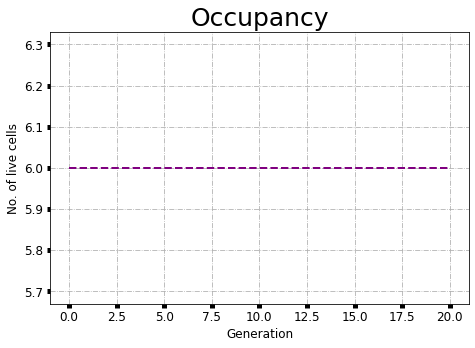

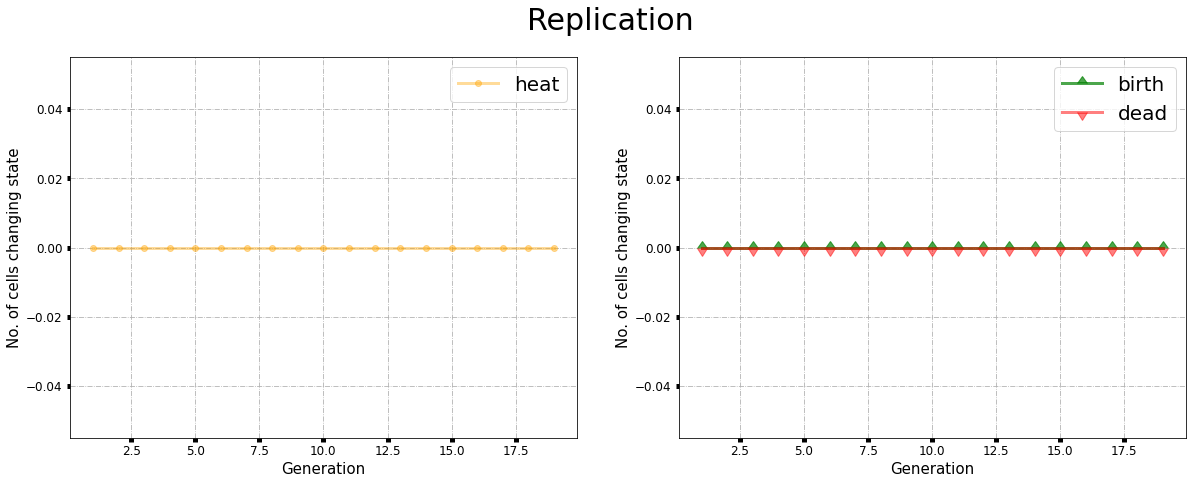

In [24]:
occupation(hive_list)
grad = replication(hive_list)


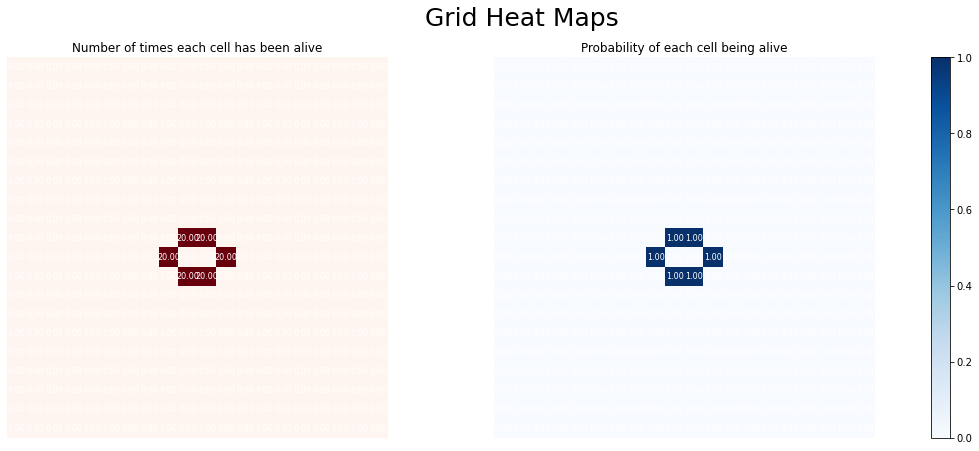

In [25]:
generate_heatmap(hive_list)

In [26]:
period = periodOfRepetition(bee_hive,hive_list)
frequency(period)

entropy = calculate_entropy(hive_list)
print(f"Entropy: {entropy}")
print('No. of cycles to return to get to initial pattern:',period)
print('Average no. of block cells changing state at each transition:',grad)

Frequency: 1.0
Entropy: 1.8176681067160696
No. of cycles to return to get to initial pattern: 1
Average no. of block cells changing state at each transition: 0.0


## 3. Loaf

In [27]:
display(HTML('''<div style="display: flex; justify-content: row;">
    <img src="./gifs/loaf_pattern.gif">
</div>'''))

In [28]:
loaf=np.array([
    [0,0,0,0,0],
    [0,1,1,0,0],
    [1,0,0,1,0],
    [0,1,0,1,0],
    [0,0,1,0,0]
    ])
loaf_grid = createStartingGrid(loaf)
loaf_list = gameOfLife(loaf_grid)
createGifs(loaf_list,'loaf_pattern')

MovieWriter ffmpeg unavailable; using Pillow instead.


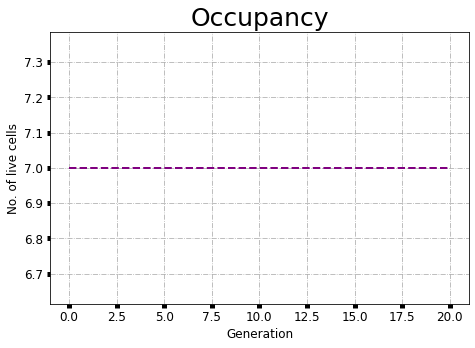

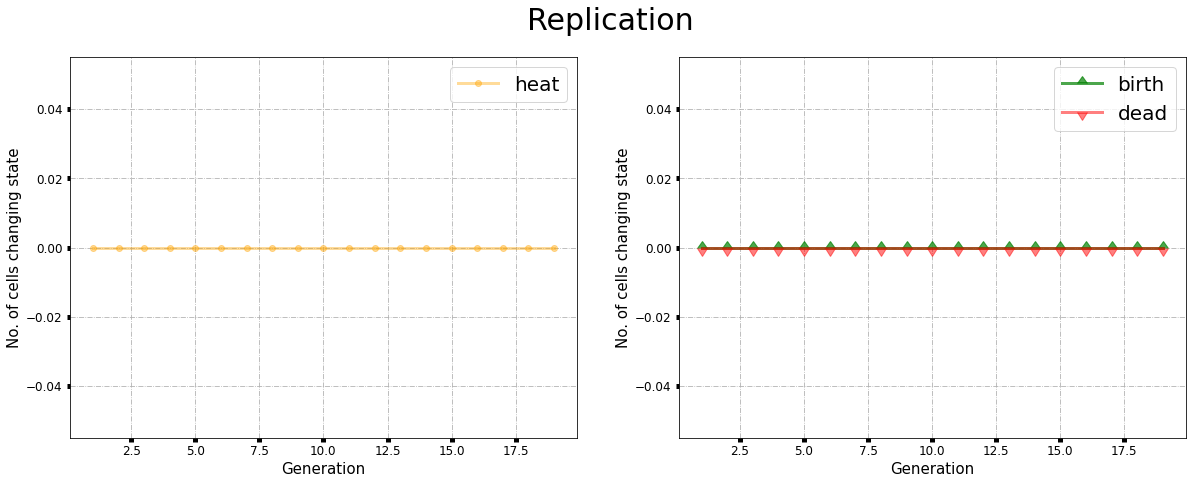

In [29]:
occupation(loaf_list)
grad = replication(loaf_list)


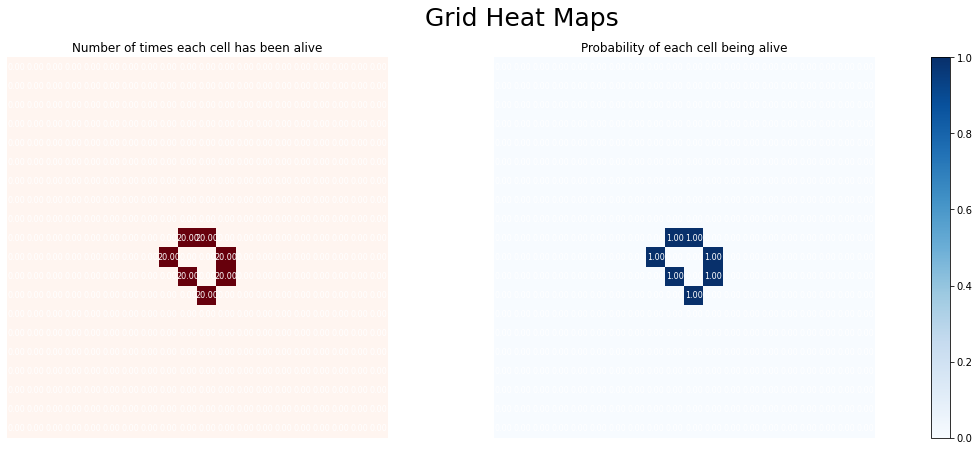

In [30]:
generate_heatmap(loaf_list)

In [31]:
period = periodOfRepetition(loaf_grid,loaf_list)
frequency(period)

entropy = calculate_entropy(loaf_list)
print(f"Entropy: {entropy}")
print('No. of cycles to return to get to initial pattern:',period)
print('Average no. of block cells changing state at each transition:',grad)

Frequency: 1.0
Entropy: 2.0427754437009913
No. of cycles to return to get to initial pattern: 1
Average no. of block cells changing state at each transition: 0.0


## 4. Boat
The boat is the only still life with 5 cells, discovered by the JHC group in 1970.

It can be thought of as a tub with an extra cell in one of the corners, or a ship with one of the corner cells removed. It can also be seen as a very deep siamization of two hooks.

In [32]:
display(HTML('''<div style="display: flex; justify-content: row;">
    <img src="./gifs/boat_pattern.gif">
</div>'''))

In [33]:
boat=np.array([
    [0,0,0,0,0],
    [0,1,1,0,0],
    [0,1,0,1,0],
    [0,0,1,0,0],
    [0,0,0,0,0]
    ])
boat_grid = createStartingGrid(boat)
boat_list = gameOfLife(boat_grid)
createGifs(boat_list,'boat_pattern')

MovieWriter ffmpeg unavailable; using Pillow instead.


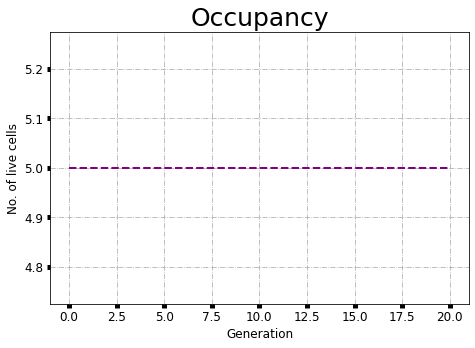

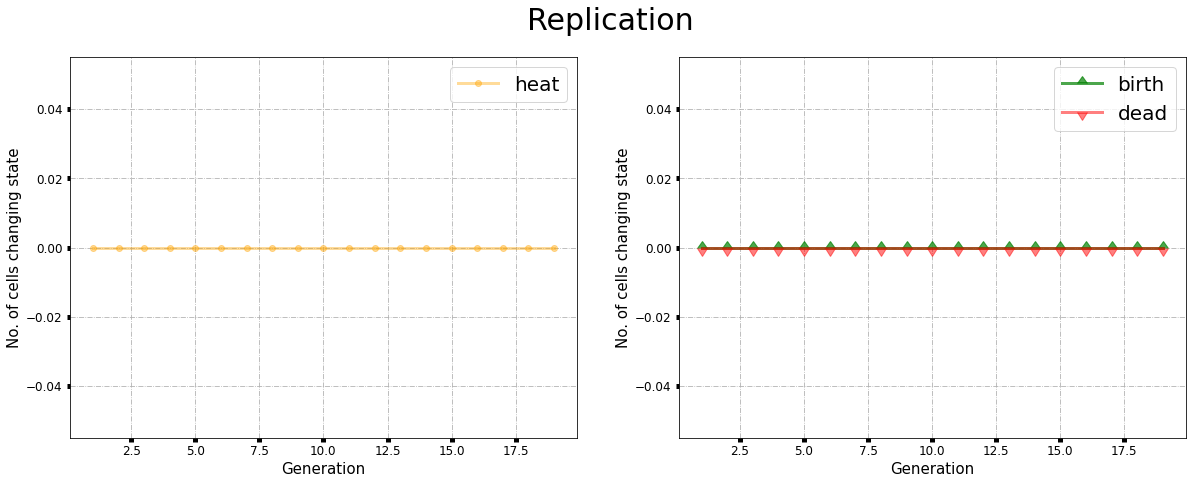

In [34]:
occupation(boat_list)
grad = replication(boat_list)


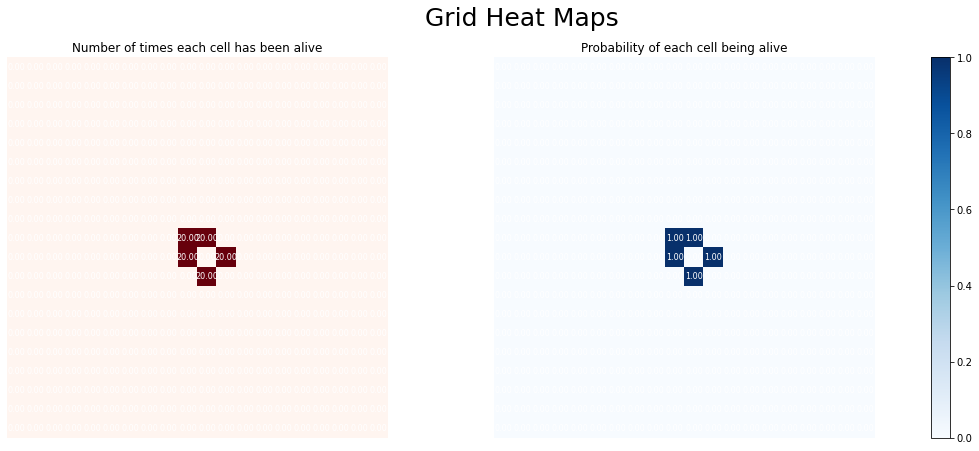

In [35]:
generate_heatmap(boat_list)

In [36]:
period = periodOfRepetition(boat_grid,boat_list)
frequency(period)

entropy = calculate_entropy(boat_list)
print(f"Entropy: {entropy}")
print('No. of cycles to return to get to initial pattern:',period)
print('Average no. of block cells changing state at each transition:',grad)

Frequency: 1.0
Entropy: 1.58048202372184
No. of cycles to return to get to initial pattern: 1
Average no. of block cells changing state at each transition: 0.0


# Oscillators

## 1. Toad

Toad is a 6-cell period-2 oscillator that was found by Simon Norton in May 1970. It is one of very few known oscillators that is a polyomino in one of its phases. Its other phase consists of two banana sparks.

In [37]:
display(HTML('''<div style="display: flex; justify-content: row;">
    <img src="./gifs/toad.gif">
</div>'''))

In [38]:
toad=np.array([
    [0,0,0,0],
    [0,1,1,1],
    [1,1,1,0],
    [0,0,0,0]
    ])
toad_grid = createStartingGrid(toad)
toad_list = gameOfLife(toad_grid)
createGifs(toad_list,'toad')

MovieWriter ffmpeg unavailable; using Pillow instead.


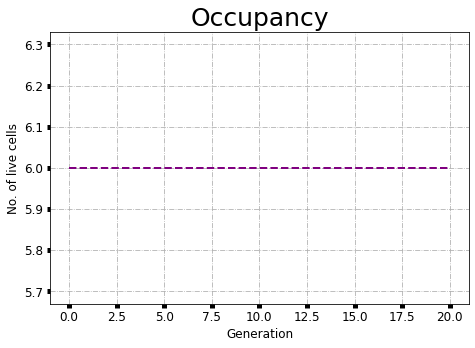

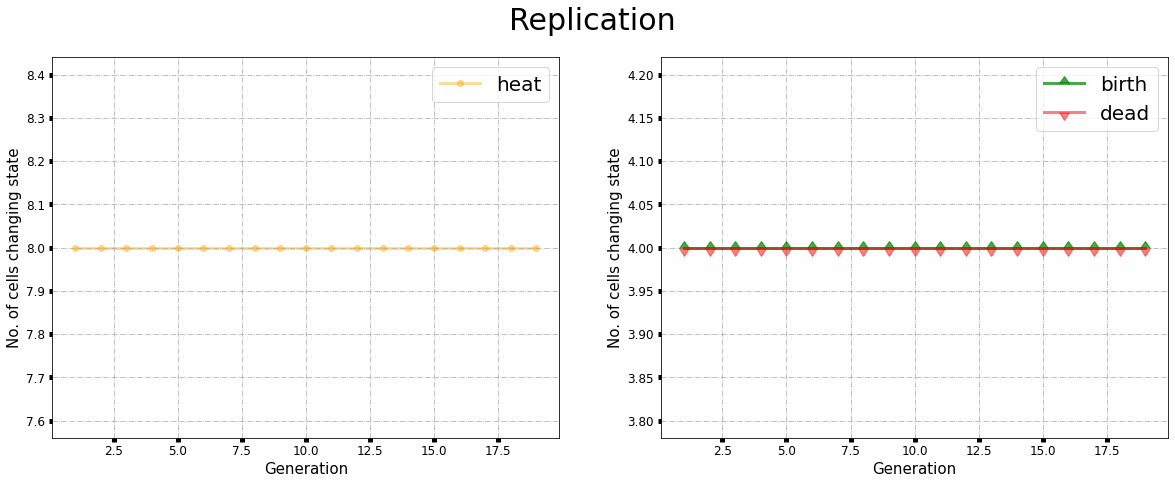

In [39]:
occupation(toad_list)
grad = replication(toad_list)


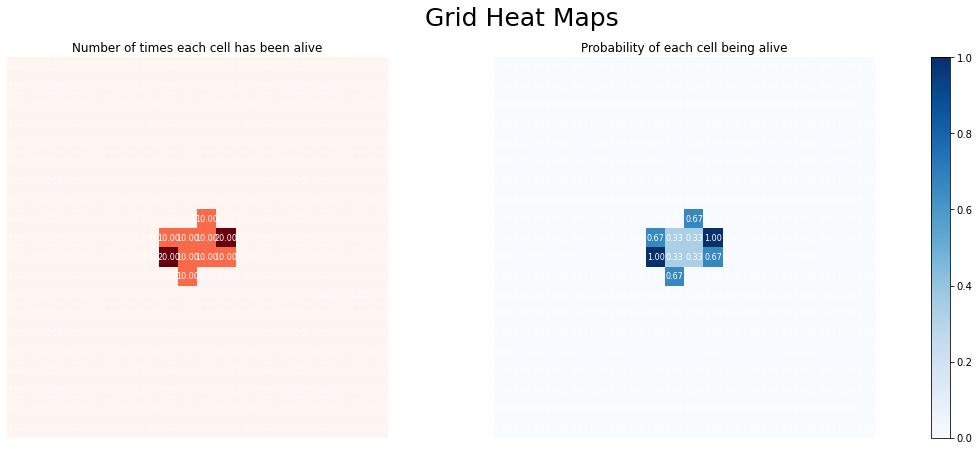

In [40]:
generate_heatmap(toad_list)

In [43]:
period = periodOfRepetition(toad,toad_list)
frequency(period)

entropy = calculate_entropy(toad_list)
print(f"Entropy: {entropy}")
print('No. of cycles to return to get to initial pattern:',period)
print('Average no. of cells changing state at each transition:',grad)

Frequency: 0.5
Entropy: 1.8176681067160696
No. of cycles to return to get to initial pattern: 2
Average no. of cells changing state at each transition: 8.0


* **Replication**: The Toad has a period of 2, which means that it returns to its original configuration every other generation. This corresponds to a frequency of 0.5, which means that the pattern oscillates every two generations.

* **Frequency**: As mentioned above, the Toad has a frequency of 0.5, which means that it oscillates every two generations. 

* **The entropy** of the Toad pattern is 1.8176681067160696, which is relatively low compared to some other patterns in the Game of Life. This means that the Toad pattern is fairly stable and predictable over time, with a relatively low amount of randomness or unpredictability.

* **Average no. of cells changing state at each transition**: The Toad consists of six live cells, which means that it changes state for all six of these cells every time it oscillates. Since the pattern has a period of two, this means that on average, eight cells change state at each transition (i.e., each generation).

* **Heatmap**: A heatmap of the Toad pattern show two different configurations, each consisting of six live cells arranged in a specific pattern. These two configurations are mirror images of each other, and they alternate back and forth with each generation.

* **Occupancy**: The Toad has an occupancy of 6%, which means that it consists of six live cells. The two configurations are arranged in such a way that they form a specific pattern as they oscillate back and forth.


## 2. Beacon 

The beacon is a common period-2 oscillator composed of two diagonally touching blocks. It was found by John Conway in March 1970.

The beacon is the simplest on-off. Its rotor, known as diagonal on-off, can be supported by several different stators: the next smallest is seen in eater plug. It can, in some sense, be considered a billiard table.

In [44]:
display(HTML('''<div style="display: flex; justify-content: row;">
    <img src="./gifs/beacon.gif">
</div>'''))

In [45]:
beacon=np.array([
    [1,1,0,0],
    [1,1,0,0],
    [0,0,1,1],
    [0,0,1,1]
    ])
beacon_grid = createStartingGrid(beacon)
beacon_list = gameOfLife(beacon_grid)
createGifs(beacon_list,'beacon')

MovieWriter ffmpeg unavailable; using Pillow instead.


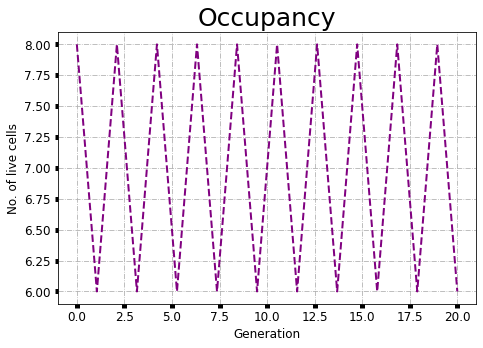

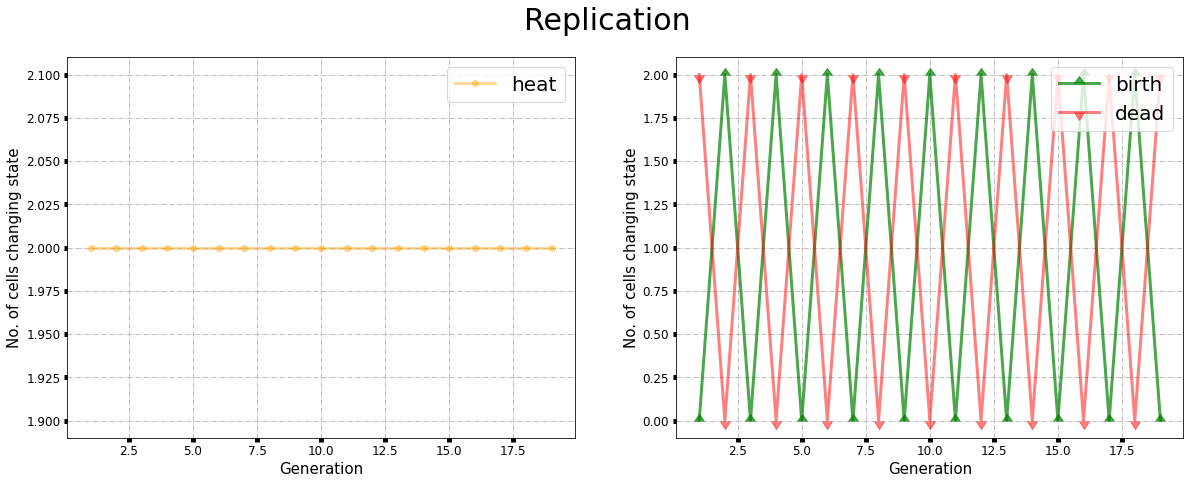

In [46]:
occupation(beacon_list)
grad = replication(beacon_list)


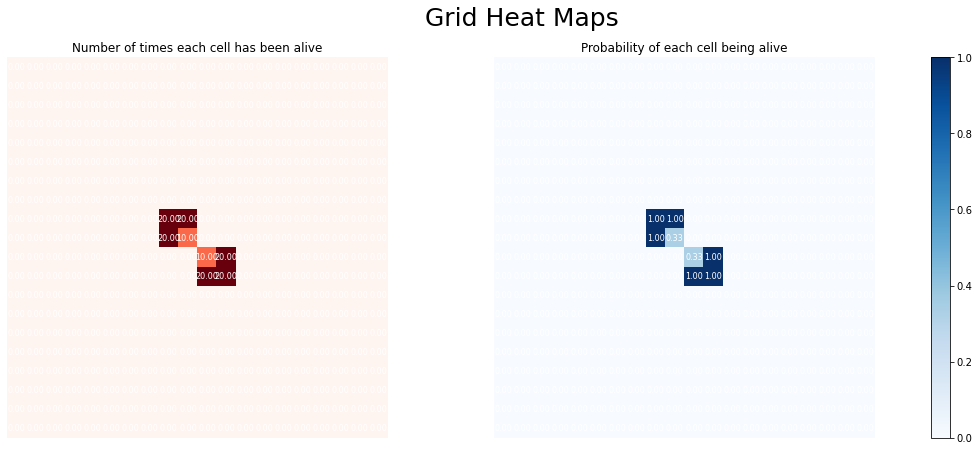

In [47]:
generate_heatmap(beacon_list)

In [48]:
period = periodOfRepetition(beacon,beacon_list)
frequency(period)

entropy = calculate_entropy(beacon_list)
print(f"Entropy: {entropy}")
print('No. of cycles to return to get to initial pattern:',period)
print('Average no. of beacon cells changing state at each transition:',grad)

Frequency: 0.5
Entropy: 2.037605291312979
No. of cycles to return to get to initial pattern: 2
Average no. of beacon cells changing state at each transition: 2.0


## 3. Pulsar

Pulsar (rarely referred to as Cambridge pulsar CP 48-56-72) is a large but surprisingly common period-3 oscillator. It was found by John Conway in March 1970.

In [49]:
display(HTML('''<div style="display: flex; justify-content: row;">
    <img src="./gifs/pulsar.gif">
</div>'''))

In [50]:
pulsar=np.array([
    [0,0,1,1,1,0,0,0,1,1,1,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,0,0,0,0,1,0,1,0,0,0,0,1],
    [1,0,0,0,0,1,0,1,0,0,0,0,1],
    [1,0,0,0,0,1,0,1,0,0,0,0,1],
    [0,0,1,1,1,0,0,0,1,1,1,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,1,1,0,0,0,1,1,1,0,0],
    [1,0,0,0,0,1,0,1,0,0,0,0,1],
    [1,0,0,0,0,1,0,1,0,0,0,0,1],
    [1,0,0,0,0,1,0,1,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,1,1,0,0,0,1,1,1,0,0]
    ])
pulsar_grid = createStartingGrid(pulsar)
pulsar_list = gameOfLife(pulsar_grid)
createGifs(pulsar_list,'pulsar')

MovieWriter ffmpeg unavailable; using Pillow instead.


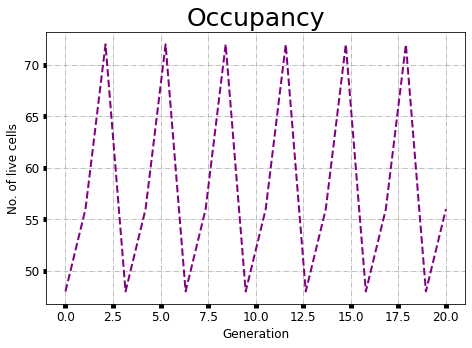

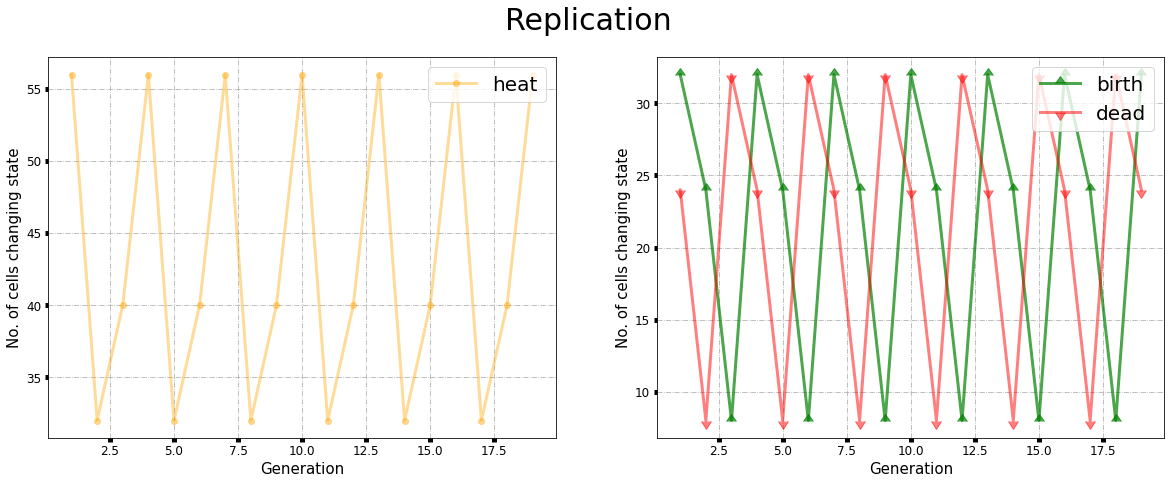

In [51]:
occupation(pulsar_list)
grad = replication(pulsar_list)


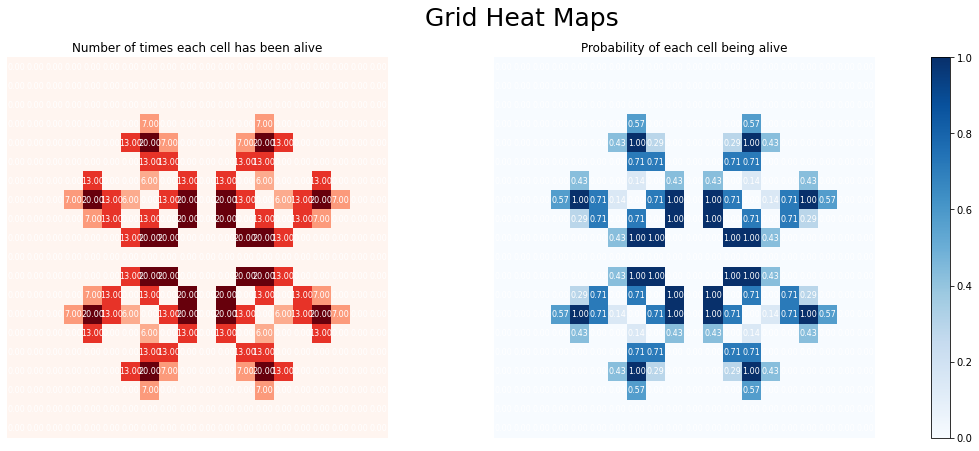

In [52]:
generate_heatmap(pulsar_list)

In [53]:
period = periodOfRepetition(pulsar,pulsar_list)
frequency(period)

entropy = calculate_entropy(pulsar_list)
print(f"Entropy: {entropy}")
print('No. of cycles to return to get to initial pattern:',period)
print('Average no. of beacon cells changing state at each transition:',grad)

Frequency: 0.3333333333333333
Entropy: 8.02108762456678
No. of cycles to return to get to initial pattern: 3
Average no. of beacon cells changing state at each transition: 43.36842105263158


## 4. Pentadecathlon
Pentadecathlon is a period-15 oscillator that was found in 1970 by John Conway while tracking the history of short rows of cells (see one-cell-thick pattern); indeed, an orthogonal row of 10 cells evolves into this object. It is the only known oscillator that is a polyomino in more than one phase (besides the blinker), and is the smallest oscillator with a period greater than its minimum population.

In [54]:
display(HTML('''<div style="display: flex; justify-content: row;">
    <img src="./gifs/pentadecathlon.gif">
</div>'''))

In [55]:
pentadecathlon = np.array([
    [0,0,0,0,0,1,1,1,0,0,0,0],
    [0,0,0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,0,1,1,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,1,1,0,0,0,0],
    [0,0,0,0,0,1,1,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,1,1,0,0,0,0],
    [0,0,0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,0,1,1,1,0,0,0,0],
])

pentadecathlon_grid = createStartingGrid(pentadecathlon)
pentadecathlon_list = gameOfLife(pentadecathlon_grid, period = 100)
createGifs(pentadecathlon_list,'pentadecathlon')

MovieWriter ffmpeg unavailable; using Pillow instead.


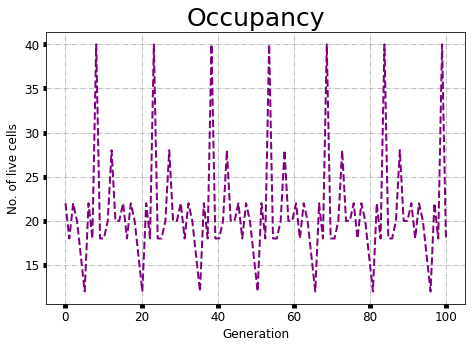

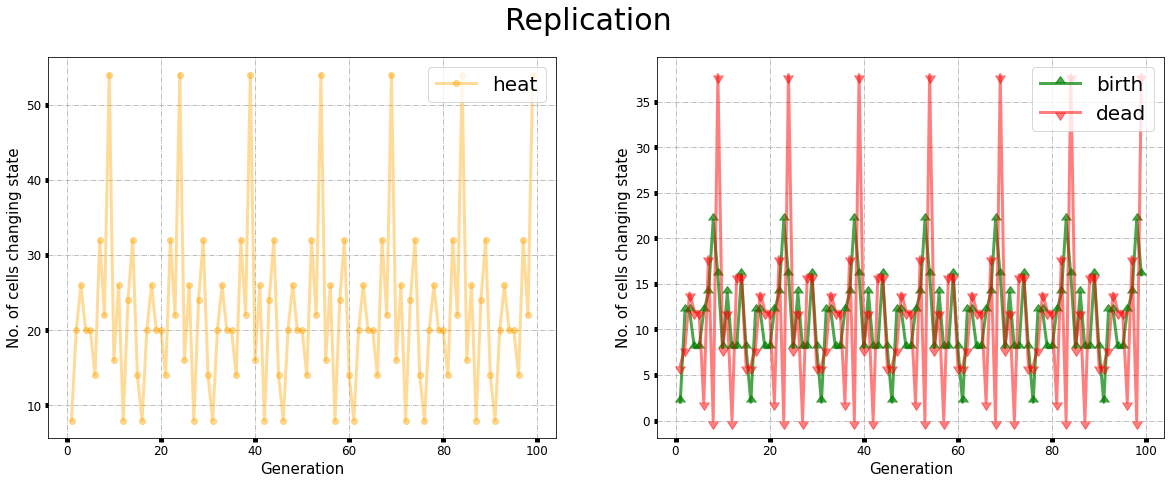

In [56]:
occupation(pentadecathlon_list)
grad = replication(pentadecathlon_list)

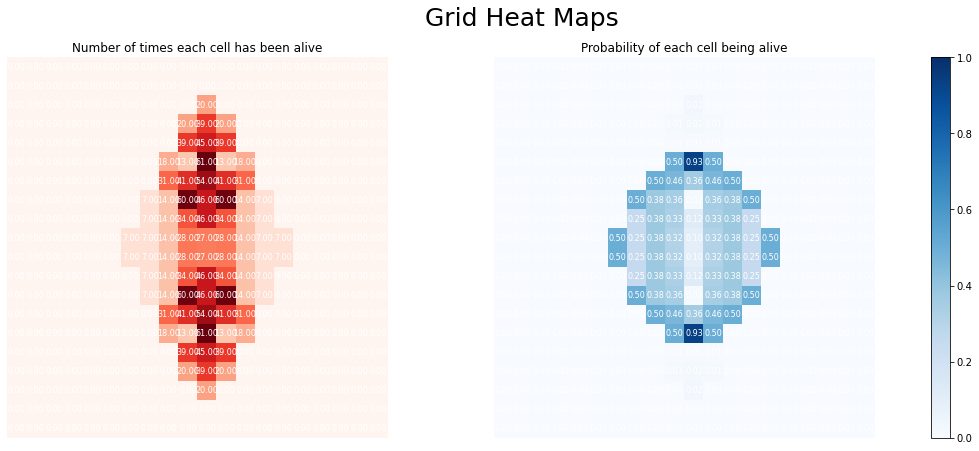

In [57]:
generate_heatmap(pentadecathlon_list)

In [58]:
period = periodOfRepetition(pentadecathlon_grid,pentadecathlon_list)
frequency(period)

entropy = calculate_entropy(pentadecathlon_list)
print(f"Entropy: {entropy}")
print('No. of cycles to return to get to initial pattern:',period)
print('Average no. of glider cells changing state at each transition:',grad)

Frequency: 0.06666666666666667
Entropy: 21.970574498797323
No. of cycles to return to get to initial pattern: 15
Average no. of glider cells changing state at each transition: 22.545454545454547


# Spaceships

## 1. Glider


The glider (or featherweight spaceship) is the smallest, most common, and first-discovered spaceship in Game of Life. It travels diagonally across the grid at a speed of c/4. Gliders are important because they are easily produced, can be collided with each other to form more complicated patterns , and can be used to transmit information over long distances.

In [59]:
display(HTML('''<div style="display: flex; justify-content: row;">
    <img src="./gifs/glider.gif">
</div>'''))

In [60]:
glider = np.array([
    [0,0,1],
    [1,0,1],
    [0,1,1]
    ])

glider_grid = createStartingGrid(glider)
glider_list = gameOfLife(glider_grid, period = 100)
createGifs(glider_list,'glider')

MovieWriter ffmpeg unavailable; using Pillow instead.


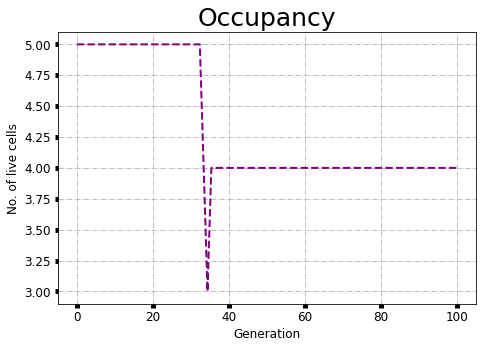

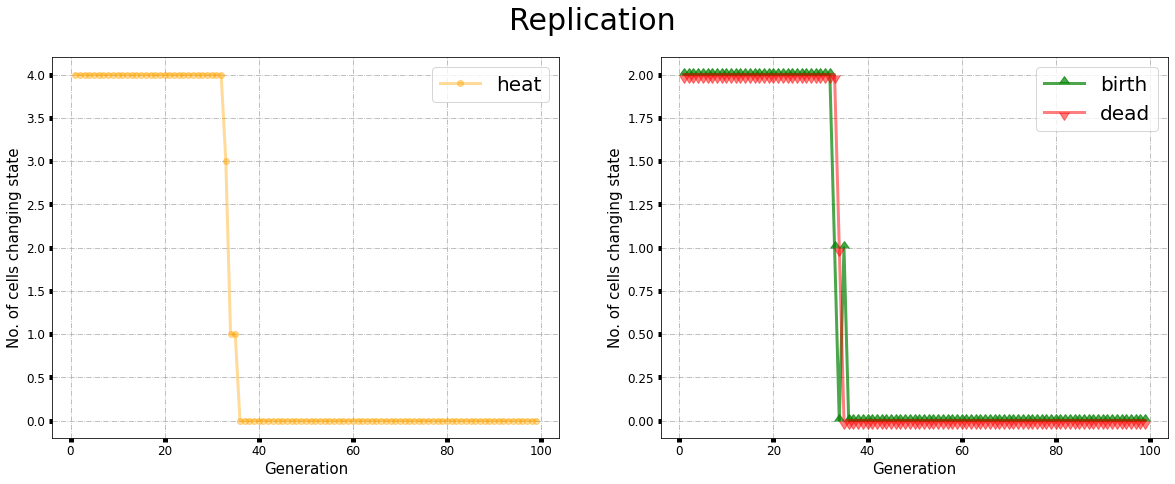

In [61]:
occupation(glider_list)
grad = replication(glider_list)

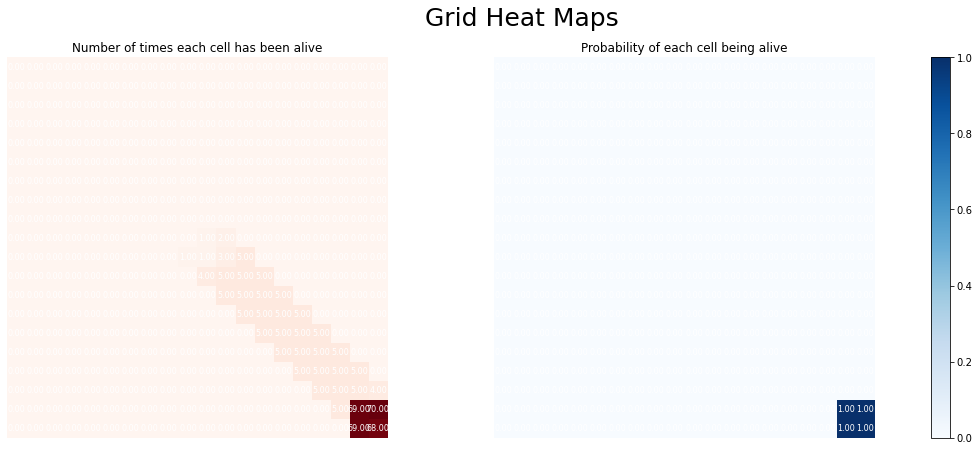

In [62]:
generate_heatmap(glider_list)

In [63]:
period = periodOfRepetition(glider,glider_list)
frequency(period)

entropy = calculate_entropy(glider_list)
print(f"Entropy: {entropy}")
print('No. of cycles to return to get to initial pattern:',period)
print('Average no. of glider cells changing state at each transition:',grad)

Frequency: 0.25
Entropy: 7.045682127060274
No. of cycles to return to get to initial pattern: 4
Average no. of glider cells changing state at each transition: 1.3434343434343434


* **Replication**: On average, the Glider pattern in the Game of Life has 1.3434 cells changing state at each transition.
* **Heatmap**: When plotted on a heatmap of the Game of Life, the Glider pattern tends to create diagonal lines of activity. This is because the pattern moves diagonally across the board, and each new Glider creates a diagonal trail of live cells behind it.
* **Frequency**: The frequency of the Glider pattern is 0.25, which means that it returns to its initial state every four generations.
* **Occupancy**: The occupancy of the Glider pattern, which is the percentage of cells in the pattern that are alive, changes from 5% to 0% before stabilizing at 4%. On average, approximately 1.3434 cells in the pattern change from being alive to dead or vice versa during each generation.
* **Entropy**: The entropy of the Glider pattern in the Game of Life is 7.045682127060274, which is relatively high compared to some other patterns. Entropy measures the degree of randomness in the pattern, and a higher entropy means that the Glider pattern is relatively complex and can quickly evolve into more random patterns compared to some other patterns.

# General comparison

## Still Alive Patterns

* **Replication**: The cells in still alive patterns don't change state, so the replication value is 0.
* **Frequency**: Since still alive patterns don't change, the frequency is infinite.
* **Occupancy**: The occupancy of still alive patterns is fixed and doesn't change.
* **Entropy**: The entropy of still alive patterns is very low because they are completely predictable and static.

## Oscillator Patterns

* **Replication**: The cells in oscillator patterns change state periodically, resulting in a replication value that depends on the specific pattern.
* **Frequency**: The frequency of oscillator patterns is the number of generations it takes for the pattern to return to its initial state.
* **Occupancy**: The occupancy of oscillator patterns changes periodically, with some cells being alive and others being dead during each cycle.
* **Entropy**: The entropy of oscillator patterns is generally low because they exhibit predictable, repetitive behavior.

## Spaceship Patterns

* **Replication**: The cells in spaceship patterns change state as they move across the board, resulting in a replication value that depends on the specific pattern.
* **Frequency**: The frequency of spaceship patterns is the number of generations it takes for the pattern to return to its initial state after completing a full cycle.
* **Occupancy**: The occupancy of spaceship patterns changes as the pattern moves across the board, with some cells being alive and others being dead at different points in its cycle.
* **Entropy**: The entropy of spaceship patterns is generally higher than oscillator patterns because they exhibit more complex and less predictable behavior as they move across the board.